# Malaria Cells Classification

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [31]:
#from fastai.data_block import *
from fastai.vision import *
import pandas as pd

In [158]:
PATH = '/home/condor/'

In [159]:
# Download and unpack the dataset, if not done yet.
URL = 'https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip'
download_url(URL, PATH)

In [156]:
!ls -la {PATH}

итого 28
drwxr-xr-x  7 condor condor 4096 янв 12 17:33 .
drwxr-xr-x 11 condor condor 4096 янв 12 17:18 ..
drwxr-xr-x  5 condor condor 4096 янв 11 10:36 cell_images
drwxr-xr-x  2 condor condor 4096 янв  2 17:27 external
drwxr-xr-x  2 condor condor 4096 янв  2 17:27 interim
drwxr-xr-x  2 condor condor 4096 янв  2 17:27 processed
drwxr-xr-x  2 condor condor 4096 янв  2 17:27 raw


In [106]:
files = get_files(f'{PATH}', extensions='.png', recurse=True)
len(files)

27558

In [10]:
# Uncomment the following to get a sample from the dataset
# sample_size = 1000
# files = random.sample(files, sample_size)

In [107]:
bs=64

In [108]:
# Get label from file_path -- folder's name
def get_label(file_path): return 'infected' if '/Parasitized/' in str(file_path) else 'clean'

In [162]:
data = ImageDataBunch.from_name_func(f'{PATH}', fnames=files, label_func=get_label, bs = bs,
                                     ds_tfms=get_transforms(), size=170).normalize(imagenet_stats)

In [165]:
data.x

ImageItemList (22047 items)
[Image (3, 169, 145), Image (3, 142, 142), Image (3, 115, 133), Image (3, 121, 130), Image (3, 142, 76)]...
Path: /home/condor

In [32]:
y_train = pd.Series(data.y)

In [53]:
data.y.items.sum()/len(data.y.items)

0.5002041094026398

In [77]:
pd.Series(data.train_ds.y).value_counts()

(infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected, infected,

In [95]:
train_y = pd.Series( list(data.train_ds.y) )

AttributeError: 'CategoryList' object has no attribute 'to_list'

In [94]:
train_y[0]

Category infected

In [82]:
data.train_dl

DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x7f411ee1f2e8>, device=device(type='cpu'), tfms=[functools.partial(<function _normalize_batch at 0x7f4096451268>, mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]), do_x=True, do_y=False)], collate_fn=<function data_collate at 0x7f4096df1a60>)

In [79]:
data.valid_ds

LabelList
y: CategoryList (5511 items)
[Category infected, Category infected, Category infected, Category clean, Category infected]...
Path: ../data/cell_images
x: ImageItemList (5511 items)
[Image (3, 139, 112), Image (3, 118, 163), Image (3, 118, 124), Image (3, 130, 133), Image (3, 139, 124)]...
Path: ../data/cell_images

In [104]:
data.kwargs

AttributeError: kwargs

In [24]:
inf = [i for i in iy if 'infected' in i]

TypeError: argument of type 'Category' is not iterable

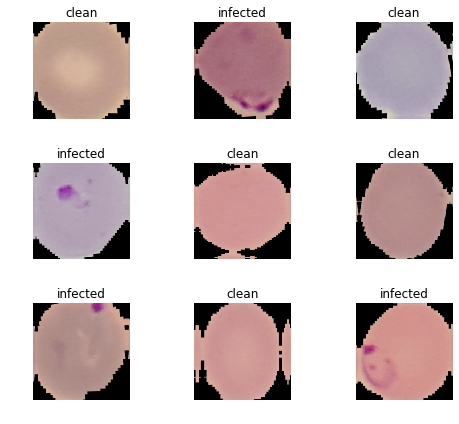

In [15]:
data.show_batch(rows=3, figsize=(7,6))

In [8]:
# By default file is created under PATH dir
#data.to_csv('cells.csv')

`x,y
Parasitized/C180P141NThinF_IMG_20151201_165453_cell_15.png,infected
Parasitized/C180P141NThinF_IMG_20151201_163848_cell_148.png,infected
Parasitized/C62P23N_ThinF_IMG_20150818_133527_cell_193.png,infected`

In [36]:
print(data.classes)
len(data.classes),data.c

['clean', 'infected']


(2, 2)

## Training: resnet34

In [52]:
learn = create_cnn(data, models.resnet34, pretrained=True, metrics=error_rate)

In [53]:
learn

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (22047 items)
[Category infected, Category infected, Category infected, Category infected, Category infected]...
Path: data/cell_images
x: ImageItemList (22047 items)
[Image (3, 118, 127), Image (3, 124, 133), Image (3, 112, 121), Image (3, 121, 127), Image (3, 133, 103)]...
Path: data/cell_images;

Valid: LabelList
y: CategoryList (5511 items)
[Category clean, Category infected, Category infected, Category infected, Category infected]...
Path: data/cell_images
x: ImageItemList (5511 items)
[Image (3, 145, 136), Image (3, 133, 136), Image (3, 136, 118), Image (3, 127, 112), Image (3, 160, 148)]...
Path: data/cell_images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilat

In [54]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.226650,0.152943,0.054618
2,0.166921,0.116977,0.043368
3,0.145932,0.111991,0.038831
4,0.138746,0.107985,0.038650


In [55]:
learn.save('stage-1')

In [56]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

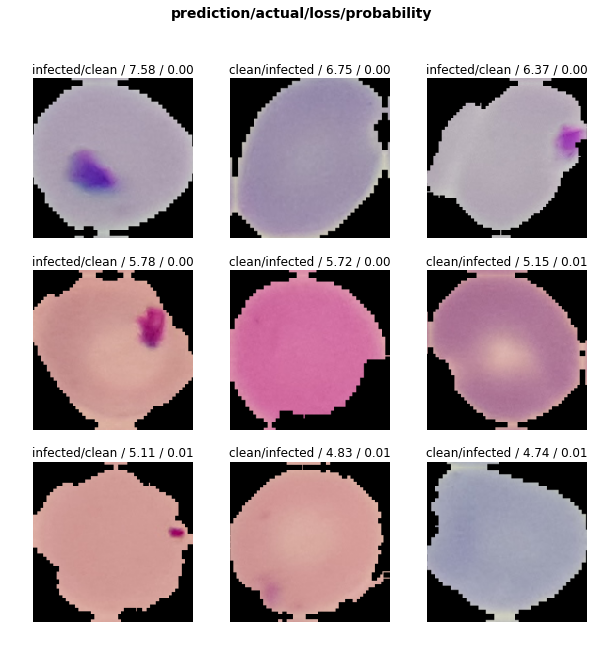

In [60]:
interp.plot_top_losses(9, figsize=(10,10))

In [61]:
doc(interp.plot_top_losses)

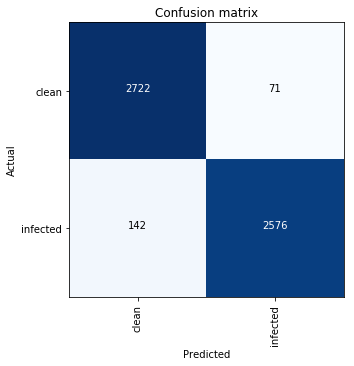

In [62]:
interp.plot_confusion_matrix(figsize=(5,5))

In [63]:
interp.most_confused(min_val=2)

[('infected', 'clean', 142), ('clean', 'infected', 71)]

## Unfreezing, fine-tuning, and learning rates

In [64]:
learn.unfreeze()

In [ ]:
learn.load('stage-1');

In [65]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


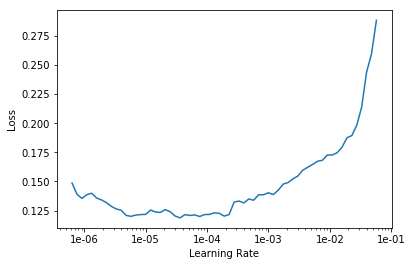

In [66]:
learn.recorder.plot()

In [67]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate
1,0.143014,0.104665,0.037561
2,0.117580,0.103833,0.036291


In [68]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate
1,0.121223,0.101308,0.035747
2,0.123744,0.099192,0.035928


In [69]:
learn.save('stage-2');

## Training: resnet50

In [76]:
#Decrease batch size

In [71]:
data = ImageDataBunch.from_name_func(f'{PATH}', fnames=files, label_func=get_label, bs=bs//2, ds_tfms=get_transforms(), size=170
                                     ).normalize(imagenet_stats)

In [72]:
data

ImageDataBunch;

Train: LabelList
y: CategoryList (22047 items)
[Category infected, Category infected, Category infected, Category infected, Category infected]...
Path: data/cell_images
x: ImageItemList (22047 items)
[Image (3, 169, 133), Image (3, 142, 148), Image (3, 112, 121), Image (3, 121, 127), Image (3, 133, 103)]...
Path: data/cell_images;

Valid: LabelList
y: CategoryList (5511 items)
[Category infected, Category clean, Category clean, Category clean, Category infected]...
Path: data/cell_images
x: ImageItemList (5511 items)
[Image (3, 130, 151), Image (3, 151, 133), Image (3, 127, 130), Image (3, 139, 103), Image (3, 124, 121)]...
Path: data/cell_images;

Test: None

In [73]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


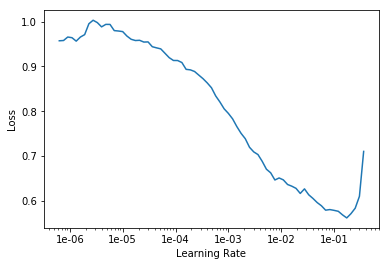

In [74]:
learn.lr_find()
learn.recorder.plot()

In [75]:
learn.fit_one_cycle(8, max_lr=1e-2)

epoch,train_loss,valid_loss,error_rate
1,0.165148,0.184232,0.061150
2,0.180200,0.135693,0.043005
3,0.155457,0.141494,0.046634
4,0.142866,0.115733,0.041372
5,0.129443,0.108013,0.038106
6,0.093216,0.101975,0.036110
7,0.103373,0.093962,0.033206
8,0.100718,0.091247,0.031573


In [77]:
learn.save('stage-1-50')

In [78]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

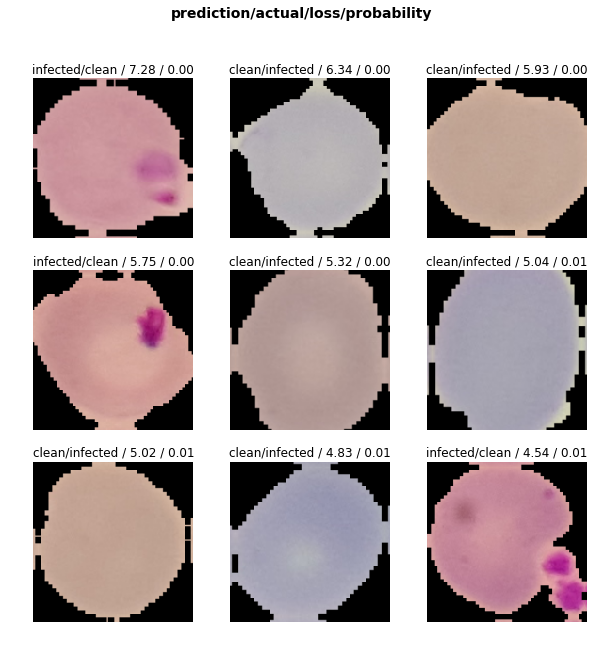

In [79]:
interp.plot_top_losses(9, figsize=(10,10))

In [80]:
doc(interp.plot_top_losses)

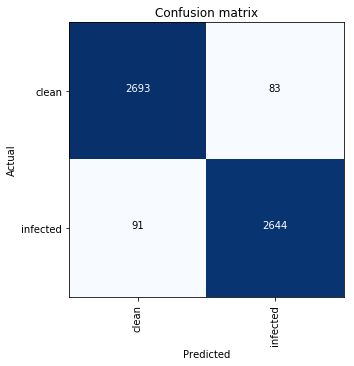

In [81]:
interp.plot_confusion_matrix(figsize=(5,5)) #, dpi=60)

In [82]:
interp.most_confused(min_val=2)

[('infected', 'clean', 91), ('clean', 'infected', 83)]

## Unfreezing, fine-tuning, and learning rates

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


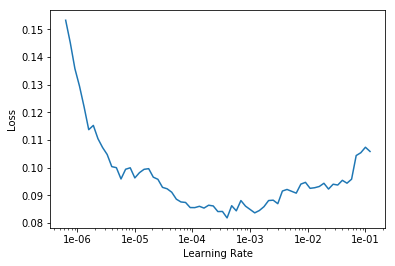

In [83]:
learn.lr_find()
learn.recorder.plot()

In [84]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(2e-5,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.113902,0.092297,0.033025
2,0.090854,0.088966,0.032118


In [85]:
learn.save('stage-2-50')